In [1]:
from copy import deepcopy

from src.simulation import Sim
from src.parameter import hhold_nw
from src.parameter import school_nw
from src.parameter import work_nw
from src.parameter import daycare_nw
from src.parameter import DAYS

Total population in ERIE County is: 900660
Population size 900660
Total Infected or explosed people at the beginning 2
Simulation of  30 days


In [2]:
if __name__ == '__main__':
    aSim = Sim()
    print ("simulation starts...")
    #Network
    H = deepcopy(hhold_nw)
    W = deepcopy(work_nw)
    S = deepcopy(school_nw)
    D = deepcopy(daycare_nw)
    SEIR, Loc, Spread_Tree = aSim.Run(H, W, S, D, DAYS)
    print("Done~")

simulation starts...
Simulation steps: 90
Init_agent->The Infected Nodes is  804518 status 2 thread 1 incubation 9 spread speed 0.05
Current Day:  0
--work-spread-- 36029004300i4207 get infected, thread 1 days 1 get exposed from 36029004300i4207 at 36029004602w270
--home-spread-- 36029005000i1528 get infected, thread 1 days 1 get exposed from 36029005000i1528 at 36029005000h1009
--work-spread-- 36029006701i151 get infected, thread 1 days 1 get exposed from 36029006701i151 at 36029004001w161
--home-spread-- 36029015201i1177 get infected, thread 1 days 1 get exposed from 36029015201i1177 at 36029015201h591
--home-spread-- 36029015201i2781 get infected, thread 1 days 1 get exposed from 36029015201i2781 at 36029015201h591
--work-spread-- 36029007303i5018 get infected, thread 1 days 1 get exposed from 36029007303i5018 at 36029004602w270
--work-spread-- 36029008002i3388 get infected, thread 1 days 1 get exposed from 36029008002i3388 at 36029004602w270
--work-spread-- 36029009401i4304 get inf

In [3]:
Spread_Tree

,0,1,2,3
0,2,36029004300i4207,36029004602w270,36029015201i1205
1,2,36029005000i1528,36029005000h1009,36029005000i1533
0,3,36029006701i151,36029004001w161,36029005000i1528
1,3,36029015201i1177,36029015201h591,36029015201i1205
2,3,36029015201i2781,36029015201h591,36029015201i1205
...,...,...,...,...
76,29,36029015301i3716,36029015301s0,36029015301i3693
77,29,36029015401i2493,36029015401h422,36029015401i723
78,29,36029015504i539,36055011708w589,36029007905i1519
79,29,36029015700i321,36029015700s0,36029015700i328


In [5]:
Spread_Tree.to_csv('gaphi_test.csv')

In [1]:
import pandas as pd
network_r = pd.read_csv('e_list.csv')
network_r

,target,source,time
0,36029004300i4207,36029015201i1205,2
1,36029005000i1528,36029005000i1533,2
2,36029006701i151,36029005000i1528,3
3,36029015201i1177,36029015201i1205,3
4,36029015201i2781,36029015201i1205,3
...,...,...,...
507,36029015301i3716,36029015301i3693,29
508,36029015401i2493,36029015401i723,29
509,36029015504i539,36029007905i1519,29
510,36029015700i321,36029015700i328,29


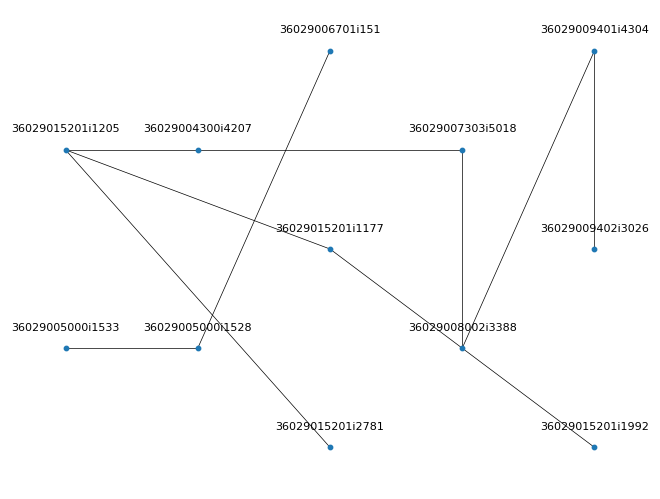

In [148]:
import networkx as nx
G = nx.Graph()

for i in network_r[:10].index:
    node_1 = network_r.iloc[i, 1] #source
    #print(node_1)
    node_2 = network_r.iloc[i, 0] # target

    time_1 = network_r.iloc[i, -1]
    time_2 = network_r.iloc[i, -1] + 2

    #print(time)
    if G.has_node(node_1):
        #print(node_1, "has is true")
        #G.add_node(node_1, level = time_1)
        G.add_node(node_2, level = time_2)
        G.add_edge(node_1, node_2)
    else:
        G.add_node(node_1, level = time_1)
        G.add_node(node_2, level = time_2)
        G.add_edge(node_1, node_2)

pos = nx.multipartite_layout(G, subset_key="level")

nx.draw(G, pos, node_size=10, width=0.5)

# shift position a little bit
#shift = [0.1, 0]
#shifted_pos ={node: node_pos + shift for node, node_pos in pos.items()}
pos_attrs = {}
labels = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] + 0.05)
    labels[node] = node



ids = []
for item in range(G.number_of_nodes()):
    ids.append(item)

node_ids = []
for n in G:
    #print(n)
    node_ids.append(n)
    #print(G.number_of_nodes())

# using dictionary comprehension
# to convert lists to dictionary
#labels = dict(zip(ids, node_ids))
import matplotlib.pylab as pl
nx.draw_networkx_labels(G, pos_attrs, font_size = 8,labels=labels,horizontalalignment="center", clip_on = False)
# adjust frame to avoid cutting text, may need to adjust the value
#axis = pl.gca()
#axis.set_xlim([1.5*x for x in axis.get_xlim()])
#axis.set_ylim([1.5*y for y in axis.get_ylim()])
# turn off frame
#pl.axis("off")
pl.show()

In [149]:
network_r

,target,source,time
0,36029004300i4207,36029015201i1205,2
1,36029005000i1528,36029005000i1533,2
2,36029006701i151,36029005000i1528,3
3,36029015201i1177,36029015201i1205,3
4,36029015201i2781,36029015201i1205,3
...,...,...,...
507,36029015301i3716,36029015301i3693,29
508,36029015401i2493,36029015401i723,29
509,36029015504i539,36029007905i1519,29
510,36029015700i321,36029015700i328,29


In [60]:
import networkx as nx

Graphtype = nx.Graph()
#G = nx.read_edgelist(network_r, delimiter=',', nodetype=str)

G = nx.from_pandas_edgelist(
    network_r[:20],
    #source="3",
    #target="1",
    #edge_attr='genre_ids',
    create_using=Graphtype
)
for e in G.edges():
    print(e)

('36029015201i1205', '36029004300i4207')
('36029015201i1205', '36029015201i1177')
('36029015201i1205', '36029015201i2781')
('36029004300i4207', '36029007303i5018')
('36029005000i1533', '36029005000i1528')
('36029005000i1528', '36029006701i151')
('36029005000i1528', '36029005000i1560')
('36029015201i1177', '36029015201i1992')
('36029007303i5018', '36029008002i3388')
('36029007303i5018', '36029009113i5366')
('36029008002i3388', '36029009401i4304')
('36029008002i3388', '36029008002i3584')
('36029009401i4304', '36029009402i3026')
('36029015201i1992', '36029015201i1989')
('36029015201i1992', '36029015302i2308')
('36029009113i5366', '36029009402i2260')
('36029009402i2260', '36029009402i2498')
('36029009402i2498', '36029009402i4201')
('36029009402i2498', '36029010202i1184')
('36029015302i2308', '36029015302i2238')


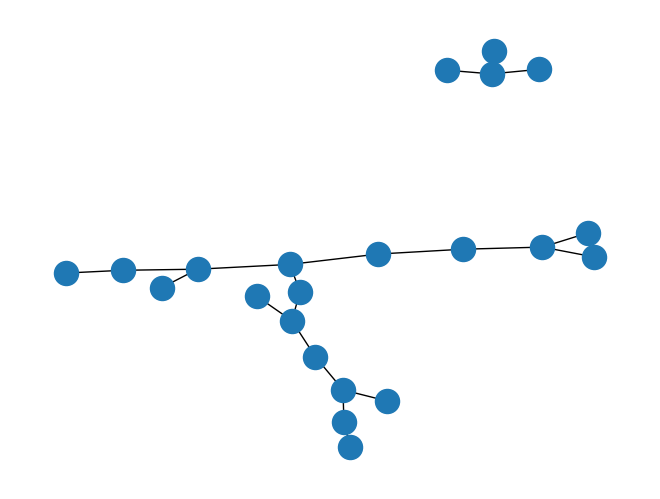

In [64]:
nx.draw(G)

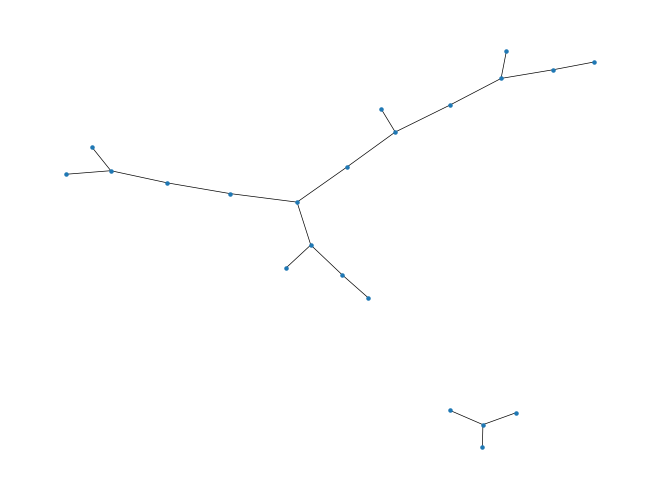

In [67]:
#pos = nx.complete_multipartite_graph(G)
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_size=5, width=0.5)

In [53]:
type(network_r)

pandas.core.frame.DataFrame

In [26]:
!pip install --upgrade pip
!pip install StringIO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
ERROR: Could not find a version that satisfies the requirement StringIO (from versions: none)
ERROR: No matching distribution found for StringIO


In [28]:
import StringIO
import networkx as nx
data = StringIO.StringIO("""1,2

2,3

1,3
""")

G = nx.read_edgelist(data, delimiter=',', nodetype=str)
for e in G.edges():
    print(e)

ModuleNotFoundError: No module named 'StringIO'

KeyError: 'source'

   Day       S  E  E1  E2  E3  I  I1  I2  I3  R  R1  R2  D
0    0  900658  0   0   0   0  2   2   0   0  0   0   0  0
1    1  900658  0   0   0   0  2   2   0   0  0   0   0  0
2    2  900657  1   1   0   0  2   2   0   0  0   0   0  0
3    3  900654  4   4   0   0  2   2   0   0  0   0   0  0
4    4  900654  4   4   0   0  2   2   0   0  0   0   0  0


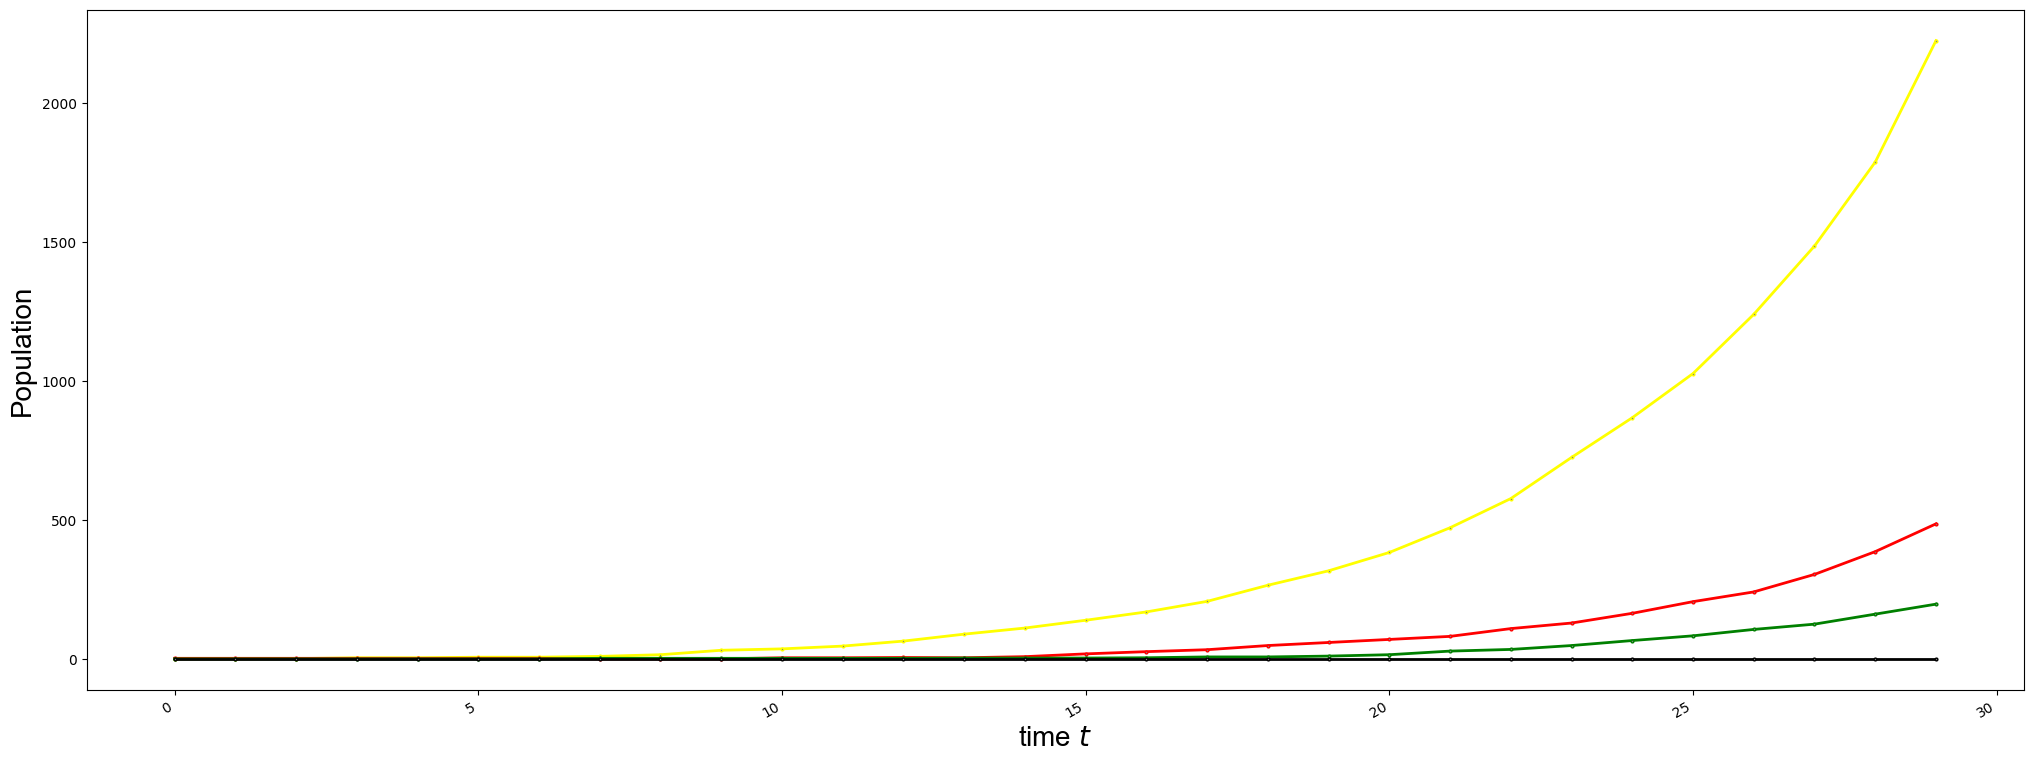

In [4]:
from src.tools import plot_SEIR
plot_SEIR(SEIR)

## 2, SEIR Results

In [4]:
import matplotlib.pyplot as plt

In [54]:
df1 = pd.read_csv('../test_overall_disease_dynamic.csv').iloc[:,1:]
df1.head()

,Day,S,E,I,R,D
0,0,900658,0,2,0,0
1,1,900656,2,2,0,0
2,2,900656,2,2,0,0
3,3,900656,2,1,1,0
4,4,900656,2,1,1,0


In [72]:
def plot_SEIR(df):
    print(df.head())
    fig, ax = plt.subplots(figsize=(25,10))

    #plt.figure(figsize=(25,10))
    plt.xlabel('time $t$', fontsize = 20, fontname = "Arial")
    plt.ylabel('Population', fontsize = 20, fontname = "Arial")


    plt.plot(df.index, df.S, marker='o', markerfacecolor='gray', markersize=2, color='skyblue', linewidth=2)

    plt.plot(df.index, df.E, marker='o', markerfacecolor='gray', markersize=2, color='yellow', linewidth=2)


    plt.plot(df.index, df.I, marker='o', markerfacecolor='gray', markersize=2, color='red', linewidth=2)


    plt.plot(df.index, df.R, marker='o', markerfacecolor='gray', markersize=2, color='green', linewidth=2)


    plt.plot(df.index, df.D, marker='o', markerfacecolor='gray', markersize=2, color='black', linewidth=2)

    #plt.legend(('Susceptible', 'Exposed', 'Infectious','Recovered', 'Dead'),
               #prop={"size":20}, fancybox=True, framealpha=1,
               #shadow=True,loc = 'upper right', ncol = 5)

    plt.gcf().autofmt_xdate() #italics of x label
    #plt.savefig('SEIR_WL.png')
    plt.show()

   Day       S  E  I  R  D
0    0  900658  0  2  0  0
1    1  900656  2  2  0  0
2    2  900656  2  2  0  0
3    3  900656  2  1  1  0
4    4  900656  2  1  1  0


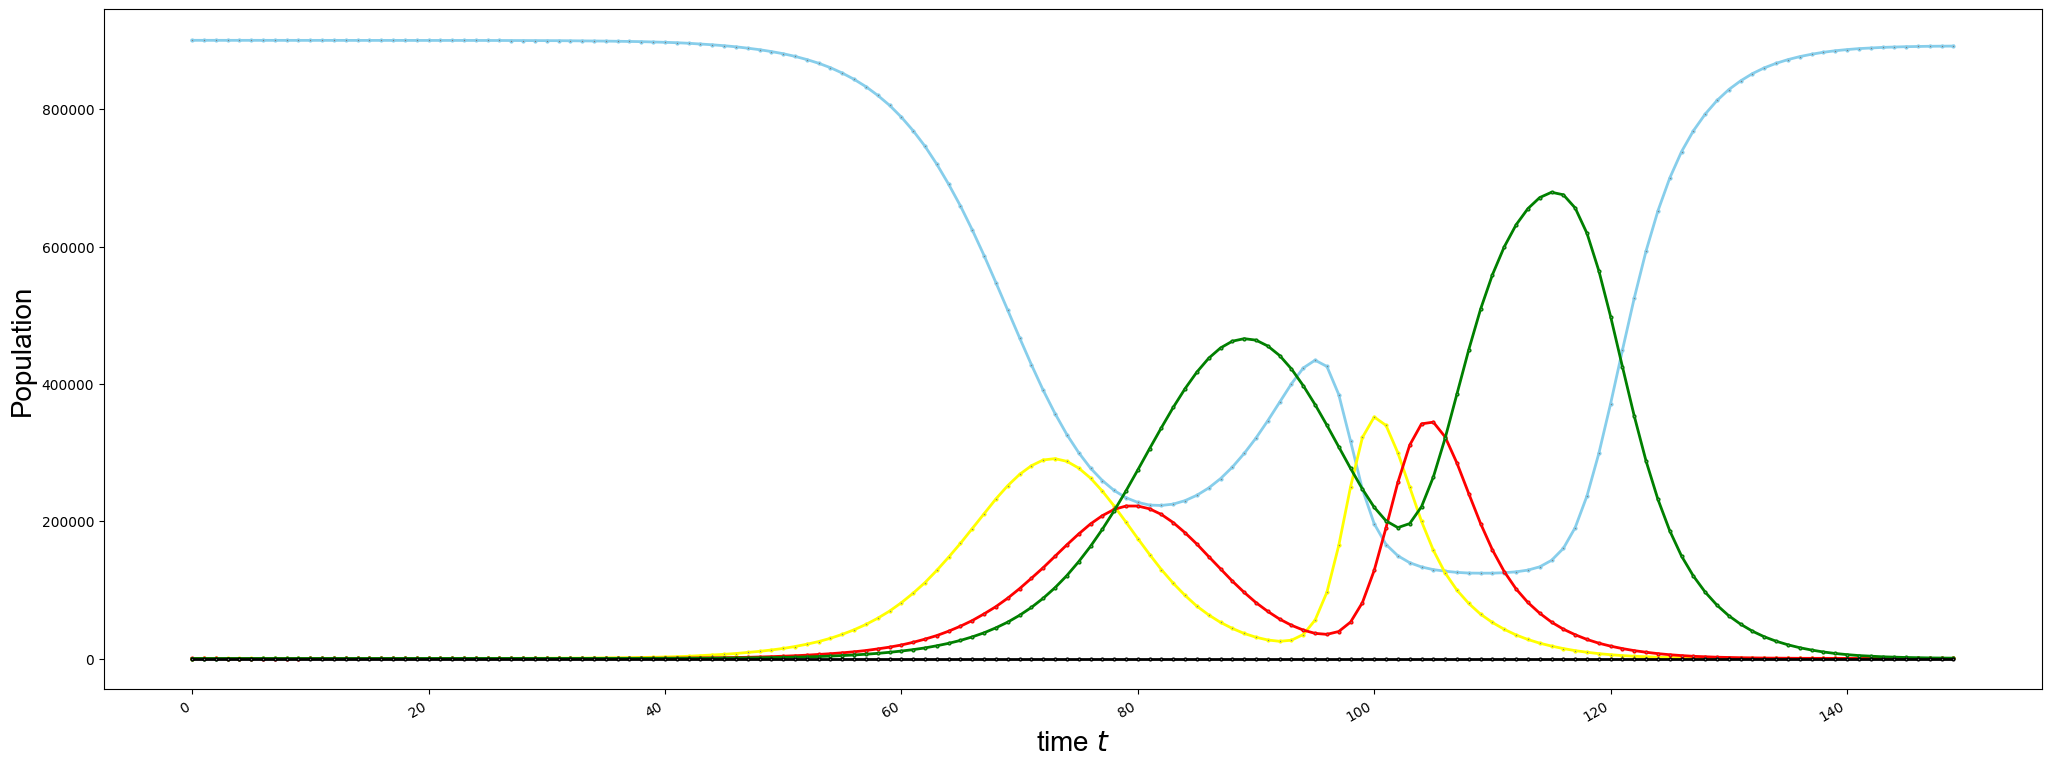

In [73]:
plot_SEIR(df1)

In [59]:
df2 = pd.read_csv('../test_multi_disease_dynamic.csv').iloc[:,1:]
df2.head()

,Day,S,E,E1,E2,I,I1,I2,R,R1,R2,D
0,0,900658,0,0,0,2,2,0,0,0,0,0
1,1,900656,2,2,0,2,2,0,0,0,0,0
2,2,900656,2,2,0,2,2,0,0,0,0,0
3,3,900656,2,2,0,1,1,0,1,1,0,0
4,4,900656,2,2,0,1,1,0,1,1,0,0


In [74]:
def plot_Multi_SEIR(df):
    print(df.head())
    fig, ax = plt.subplots(figsize=(25,10))

    #plt.figure(figsize=(25,10))
    plt.xlabel('time $t$', fontsize = 20, fontname = "Arial")
    plt.ylabel('Population', fontsize = 20, fontname = "Arial")


    #plt.plot(df.index, df.S, marker='o', markerfacecolor='gray', markersize=2, color='skyblue', linewidth=2)

    #plt.plot(df.index, df.E, marker='o', markerfacecolor='gray', markersize=2, color='yellow', linewidth=2)
    plt.plot(df.index, df.E1, marker='*', markerfacecolor='gray', markersize= 10, color='yellow', linewidth=2)
    plt.plot(df.index + 1, df.E2, marker='+', markerfacecolor='gray', markersize= 10, color='orange', linewidth=2)
    #plt.plot(df.index + 1, df.E3, marker='+', markerfacecolor='gray', markersize= 10, color='orange', linewidth=2)

    #plt.plot(df.index, df.I, marker='o', markerfacecolor='gray', markersize=2, color='red', linewidth=2)
    plt.plot(df.index, df.I1, marker='*', markerfacecolor='gray', markersize=10, color='red', linewidth=2)
    plt.plot(df.index + 1, df.I2, marker='+', markerfacecolor='gray', markersize=10, color='pink', linewidth=2)
    #plt.plot(df.index + 1, df.I3, marker='+', markerfacecolor='gray', markersize= 10, color='darkred', linewidth=2)

    #plt.plot(df.index, df.R, marker='o', markerfacecolor='gray', markersize=2, color='green', linewidth=2)
    #plt.plot(df.index, df.R1, marker='*', markerfacecolor='gray', markersize=10, color='green', linewidth=2)
    #plt.plot(df.index + 1, df.R2, marker='+', markerfacecolor='gray', markersize=10, color='springgreen', linewidth=2)

    #plt.plot(df.index, df.D, marker='o', markerfacecolor='gray', markersize=2, color='black', linewidth=2)

    plt.legend(('Disease 1 Exposed','Disease 2 Exposed', 'Disease 1 Infectious','Disease 2 Infectious'),
               prop={"size":20}, fancybox=True, framealpha=1, shadow=True,loc = 'upper right', ncol = 4)

    plt.gcf().autofmt_xdate() #italics of x label
    #plt.savefig('SEIR_WL.png')
    plt.show()

   Day       S  E  E1  E2  I  I1  I2  R  R1  R2  D
0    0  900658  0   0   0  2   2   0  0   0   0  0
1    1  900656  2   2   0  2   2   0  0   0   0  0
2    2  900656  2   2   0  2   2   0  0   0   0  0
3    3  900656  2   2   0  1   1   0  1   1   0  0
4    4  900656  2   2   0  1   1   0  1   1   0  0


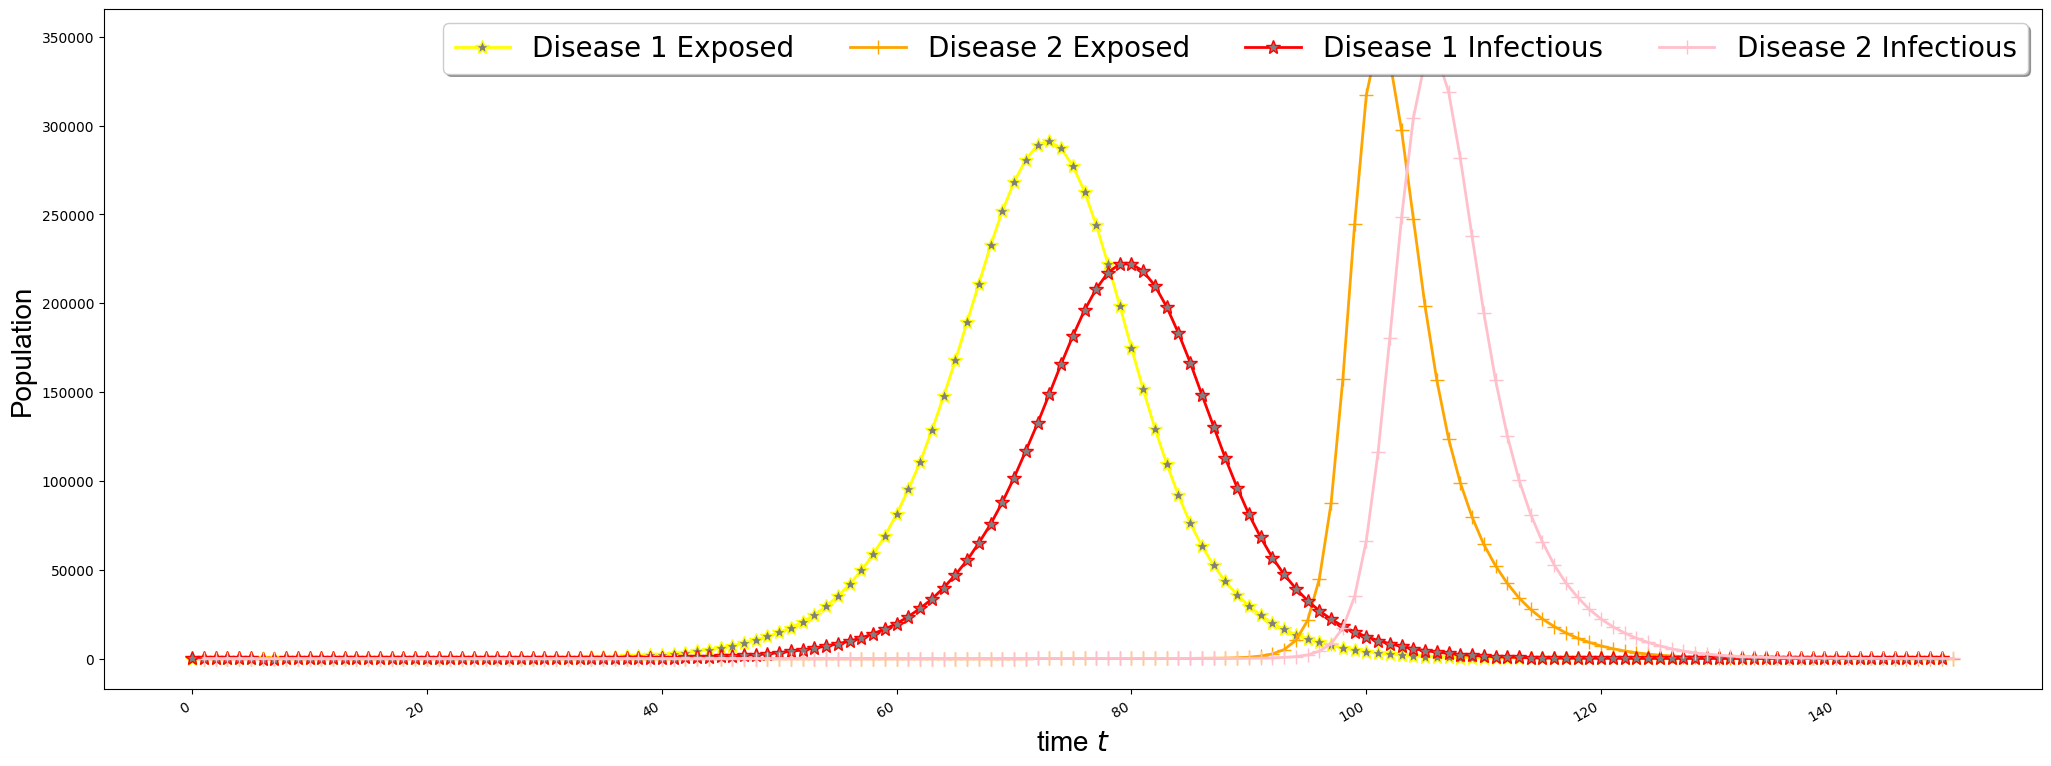

In [75]:
plot_Multi_SEIR(df2)

In [39]:
df2 = pd.read_csv('../test_disease_dynamic.csv').iloc[:,1:]
df2.head()

,Day,S,E,E1,E2,I,I1,I2,R,R1,R2,D
0,0,900658,0,0,0,2,2,0,0,0,0,0
1,1,900656,2,2,0,2,2,0,0,0,0,0
2,2,900655,3,3,0,2,2,0,0,0,0,0
3,3,900655,3,3,0,2,2,0,0,0,0,0
4,4,900655,3,3,0,2,2,0,0,0,0,0


   Day       S  E  E1  E2  I  I1  I2  R  R1  R2  D
0    0  900658  0   0   0  2   2   0  0   0   0  0
1    1  900656  2   2   0  2   2   0  0   0   0  0
2    2  900655  3   3   0  2   2   0  0   0   0  0
3    3  900655  3   3   0  2   2   0  0   0   0  0
4    4  900655  3   3   0  2   2   0  0   0   0  0


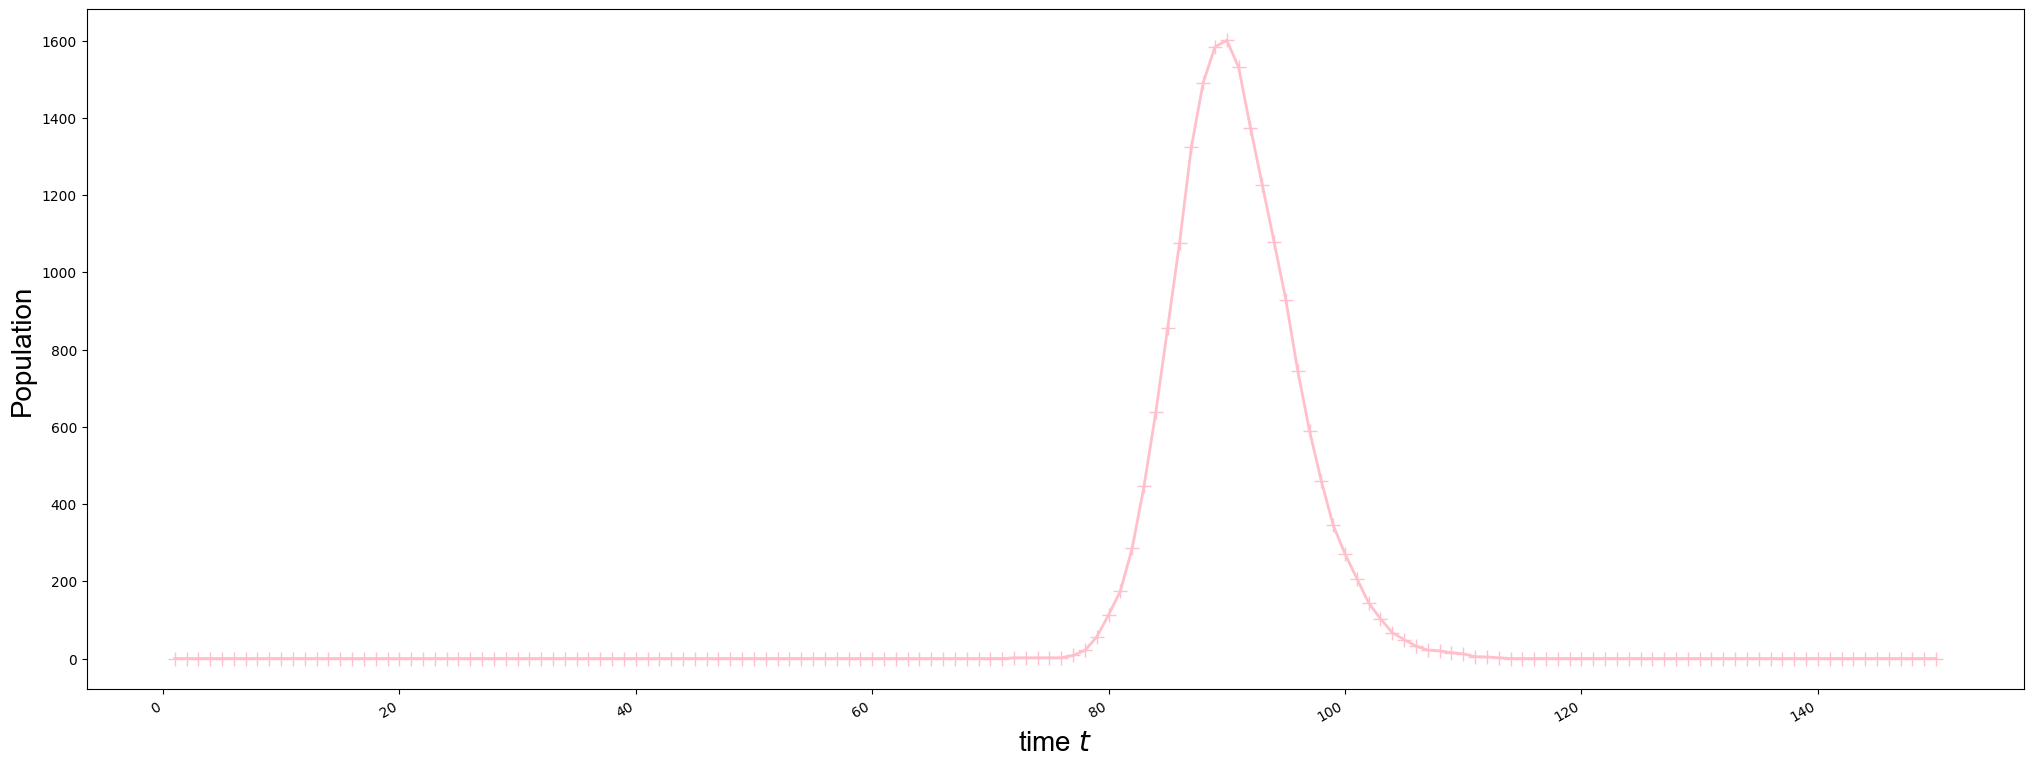

In [44]:
plot_SEIR(df2)

In [45]:
df3 = pd.read_csv('../test_disease_dynamic.csv').iloc[:,1:]
df3.head()

,Day,S,E,E1,E2,I,I1,I2,R,R1,R2,D
0,0,900658,0,0,0,2,2,0,0,0,0,0
1,1,900655,3,3,0,2,2,0,0,0,0,0
2,2,900651,7,7,0,2,2,0,0,0,0,0
3,3,900649,9,9,0,2,2,0,0,0,0,0
4,4,900648,10,10,0,2,2,0,0,0,0,0


   Day       S   E  E1  E2  I  I1  I2  R  R1  R2  D
0    0  900658   0   0   0  2   2   0  0   0   0  0
1    1  900655   3   3   0  2   2   0  0   0   0  0
2    2  900651   7   7   0  2   2   0  0   0   0  0
3    3  900649   9   9   0  2   2   0  0   0   0  0
4    4  900648  10  10   0  2   2   0  0   0   0  0


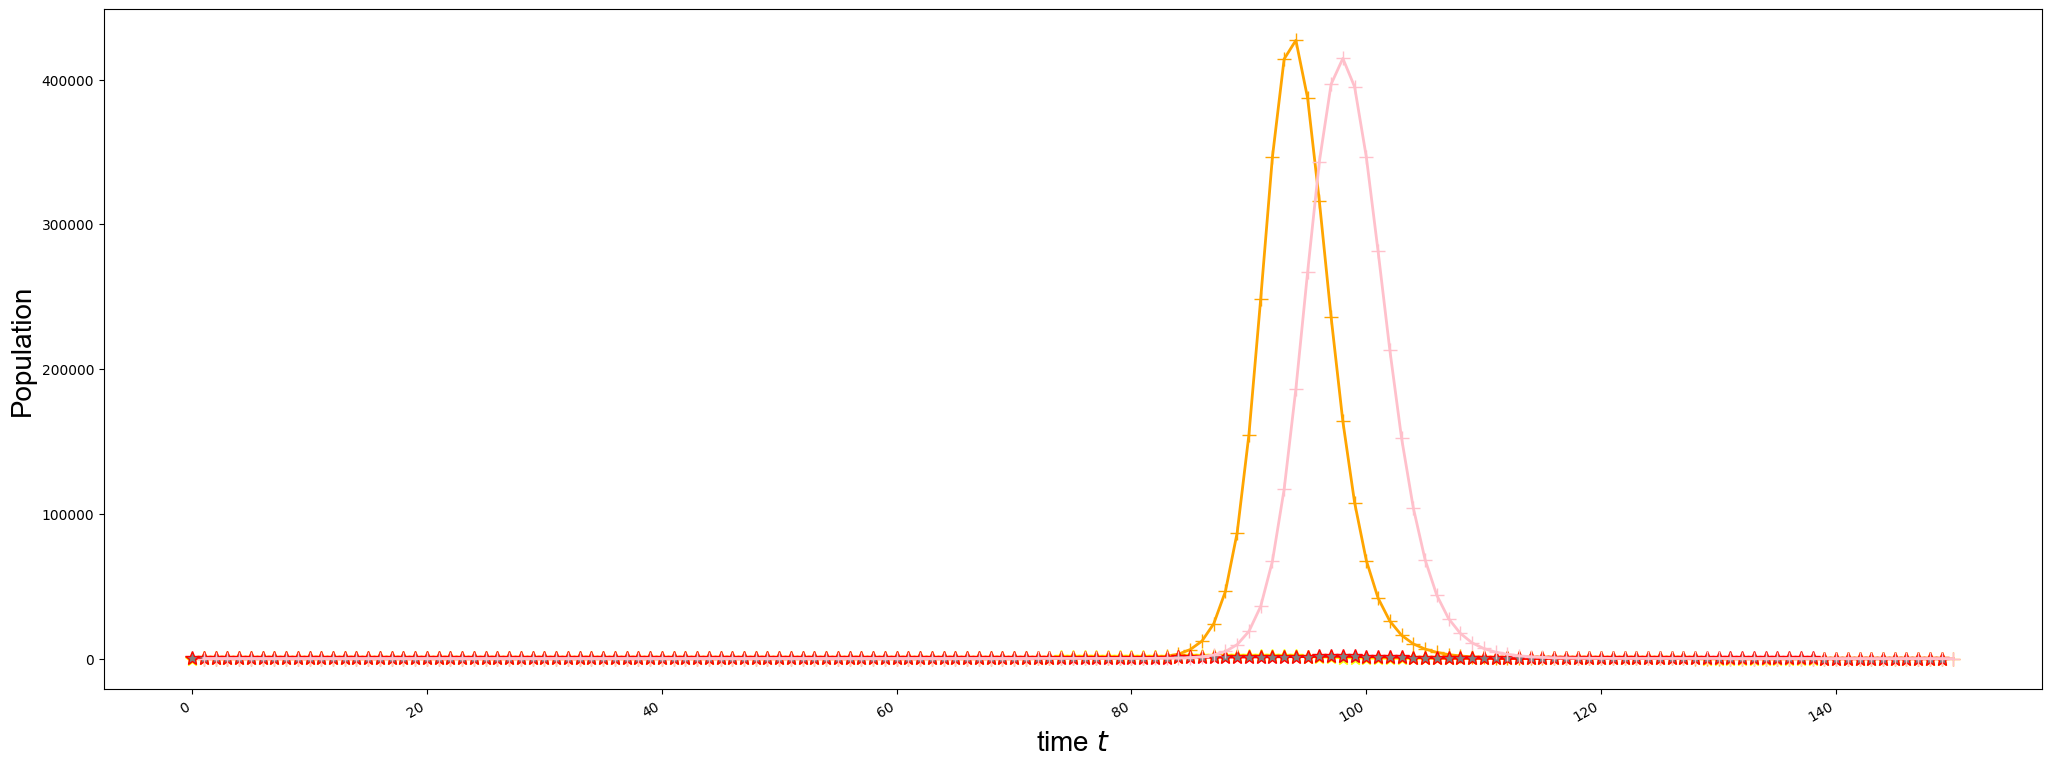

In [48]:
plot_SEIR(df3)